In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from fuzzywuzzy import process

warnings.simplefilter("ignore")

c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
df = pd.read_csv(r"WDI.csv")

In [3]:
df.head()

,Unnamed: 0,Nation,Survey_Year,Country_Category,Mortality_Adults,Infant_Deaths_Count,Alcohol_Consumption_Rate,Expenditure_Percentage_GDP,Hepatitis_B_Vaccination_Coverage,Measles_Infection_Count,Body_Mass_Index_Avg,Polio_Vaccination_Coverage,Total_Health_Expenditure,Diphtheria_Vaccination_Coverage,HIV_AIDS_Prevalence_Rate,Gross_Domestic_Product,Total_Population,Thinness,Life_Expectancy_Years
0,0,Syrian Arab Republic,2006.0,Developing,123.0,8,0.97,122.652333,83.0,517.0,48.5,83.0,3.78,8.0,0.1,1762.246170,18914977.0,6.4,73.7
1,1,Croatia,2006.0,Developed,113.0,0,11.83,1555.651986,NaN,1.0,58.1,96.0,6.95,96.0,0.1,11363.418450,444.0,1.8,75.9
2,2,Montenegro,2007.0,Developing,125.0,0,4.98,678.518894,9.0,0.0,57.2,92.0,6.74,92.0,0.1,5957.145693,615875.0,2.1,74.2
3,3,Bahrain,2014.0,Developing,7.0,0,1.57,367.255674,98.0,46.0,62.9,98.0,4.98,98.0,0.1,24983.379200,NaN,6.1,76.8
4,4,Kenya,2000.0,Developing,428.0,77,1.51,0.681686,NaN,21002.0,14.4,8.0,4.68,82.0,18.1,43.979713,3145483.0,9.2,51.9


In [4]:
df.sort_values(by="Survey_Year")

,Unnamed: 0,Nation,Survey_Year,Country_Category,Mortality_Adults,Infant_Deaths_Count,Alcohol_Consumption_Rate,Expenditure_Percentage_GDP,Hepatitis_B_Vaccination_Coverage,Measles_Infection_Count,Body_Mass_Index_Avg,Polio_Vaccination_Coverage,Total_Health_Expenditure,Diphtheria_Vaccination_Coverage,HIV_AIDS_Prevalence_Rate,Gross_Domestic_Product,Total_Population,Thinness,Life_Expectancy_Years
1723,1723,Thailand,2000.0,Developing,194.0,18,5.88,0.275648,95.0,4074.0,18.7,97.0,3.40,97.0,0.8,27.564826,6295821.0,9.4,71.1
2670,2670,Saint Vincent and the Grenadines,2000.0,Developing,186.0,0,4.80,0.000000,NaN,0.0,4.1,99.0,3.73,98.0,0.7,NaN,NaN,4.0,79.0
169,169,Samoa,2000.0,Developing,18.0,0,3.00,21.254300,89.0,0.0,65.6,94.0,5.31,95.0,0.1,154.689230,17461.0,0.2,72.0
1779,1779,India,2000.0,Developing,224.0,1800,0.93,19.266157,NaN,38835.0,11.4,57.0,4.26,58.0,0.3,438.864634,1535912.0,27.7,62.5
172,172,Bahamas,2000.0,Developing,192.0,0,12.15,0.000000,NaN,0.0,54.4,91.0,5.21,99.0,0.1,NaN,NaN,2.7,72.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759,1759,United States of America,2015.0,Developed,13.0,23,NaN,0.000000,92.0,188.0,69.6,93.0,NaN,95.0,0.1,NaN,NaN,0.8,79.3
96,96,Slovakia,2015.0,Developed,19.0,0,NaN,0.000000,96.0,1.0,59.1,96.0,NaN,96.0,0.1,NaN,NaN,1.2,76.7
2441,2441,Haiti,2015.0,Developing,24.0,14,NaN,0.000000,6.0,0.0,49.9,56.0,NaN,6.0,0.5,814.546395,171161.0,3.9,63.5
134,134,Niger,NaN,Developing,28.0,56,0.10,20.268766,NaN,54190.0,14.6,44.0,6.23,41.0,1.6,215.854800,1265687.0,12.3,52.1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        2938 non-null   int64  
 1   Nation                            2937 non-null   object 
 2   Survey_Year                       2936 non-null   float64
 3   Country_Category                  2935 non-null   object 
 4   Mortality_Adults                  2925 non-null   float64
 5   Infant_Deaths_Count               2938 non-null   int64  
 6   Alcohol_Consumption_Rate          2744 non-null   float64
 7   Expenditure_Percentage_GDP        2938 non-null   float64
 8   Hepatitis_B_Vaccination_Coverage  2385 non-null   float64
 9   Measles_Infection_Count           2936 non-null   float64
 10  Body_Mass_Index_Avg               2904 non-null   float64
 11  Polio_Vaccination_Coverage        2919 non-null   float64
 12  Total_

In [6]:
df.describe()

,Unnamed: 0,Survey_Year,Mortality_Adults,Infant_Deaths_Count,Alcohol_Consumption_Rate,Expenditure_Percentage_GDP,Hepatitis_B_Vaccination_Coverage,Measles_Infection_Count,Body_Mass_Index_Avg,Polio_Vaccination_Coverage,Total_Health_Expenditure,Diphtheria_Vaccination_Coverage,HIV_AIDS_Prevalence_Rate,Gross_Domestic_Product,Total_Population,Thinness,Life_Expectancy_Years
count,2938.000000,2936.00000,2925.000000,2938.000000,2744.000000,2938.000000,2385.000000,2936.000000,2904.000000,2919.000000,2711.000000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2928.000000
mean,1468.500000,2007.52282,164.865299,30.303948,4.602861,738.251295,80.940461,2420.752384,38.321247,82.550188,5.938359,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,69.224932
std,848.271871,4.61257,124.316868,117.926501,4.052413,1987.914858,25.070016,11471.077443,20.044034,23.428046,2.498765,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,9.523867
min,0.000000,2000.00000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,36.300000
25%,734.250000,2004.00000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,78.000000,4.260000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,63.100000
50%,1468.500000,2008.00000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,93.000000,5.760000,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,72.100000
75%,2202.750000,2012.00000,228.000000,22.000000,7.702500,441.534144,97.000000,358.750000,56.200000,97.000000,7.495000,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,75.700000
max,2937.000000,2015.00000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,89.000000


In [7]:
100 * df.isna().sum() / df.shape[0]

Unnamed: 0                           0.000000
Nation                               0.034037
Survey_Year                          0.068074
Country_Category                     0.102110
Mortality_Adults                     0.442478
Infant_Deaths_Count                  0.000000
Alcohol_Consumption_Rate             6.603131
Expenditure_Percentage_GDP           0.000000
Hepatitis_B_Vaccination_Coverage    18.822328
Measles_Infection_Count              0.068074
Body_Mass_Index_Avg                  1.157250
Polio_Vaccination_Coverage           0.646698
Total_Health_Expenditure             7.726344
Diphtheria_Vaccination_Coverage      0.646698
HIV_AIDS_Prevalence_Rate             0.000000
Gross_Domestic_Product              15.248468
Total_Population                    22.191967
Thinness                             1.157250
Life_Expectancy_Years                0.340368
dtype: float64

In [8]:
df.duplicated().sum()

0

# Conclusion 
    . data has 2938 rows and 19 columns
    . most attributes are numerical
    . useless columns [Unnamed 0]

# Cleaning


In [9]:
df.isna().sum()

Unnamed: 0                            0
Nation                                1
Survey_Year                           2
Country_Category                      3
Mortality_Adults                     13
Infant_Deaths_Count                   0
Alcohol_Consumption_Rate            194
Expenditure_Percentage_GDP            0
Hepatitis_B_Vaccination_Coverage    553
Measles_Infection_Count               2
Body_Mass_Index_Avg                  34
Polio_Vaccination_Coverage           19
Total_Health_Expenditure            227
Diphtheria_Vaccination_Coverage      19
HIV_AIDS_Prevalence_Rate              0
Gross_Domestic_Product              448
Total_Population                    652
Thinness                             34
Life_Expectancy_Years                10
dtype: int64

In [10]:
df.drop(columns=["Unnamed: 0"], inplace=True)

<Axes: ylabel='Alcohol_Consumption_Rate'>

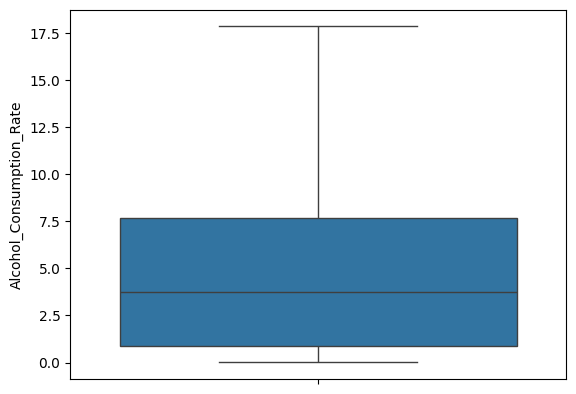

In [11]:
sns.boxplot(df["Alcohol_Consumption_Rate"])

In [12]:
filt = df["Alcohol_Consumption_Rate"].isna()
countirs = df.loc[filt, "Nation"].value_counts().index

In [13]:
alco = df["Alcohol_Consumption_Rate"].groupby(df["Nation"]).median()
for country in countirs:
    df.loc[
        (df["Nation"] == country) & (df["Alcohol_Consumption_Rate"].isna()),
        "Alcohol_Consumption_Rate",
    ] = alco[country]

In [14]:
df["Hepatitis_B_Vaccination_Coverage"].isna().sum()

553

In [15]:
hepa = df["Hepatitis_B_Vaccination_Coverage"].groupby(df["Nation"]).median()
for country in countirs:
    df.loc[
        (df["Nation"] == country) & (df["Hepatitis_B_Vaccination_Coverage"].isna()),
        "Hepatitis_B_Vaccination_Coverage",
    ] = hepa[country]

In [16]:
df["Hepatitis_B_Vaccination_Coverage"].value_counts()

Hepatitis_B_Vaccination_Coverage
99.0    251
98.0    210
96.0    175
97.0    168
95.0    163
       ... 
15.0      1
32.0      1
1.0       1
12.0      1
19.0      1
Name: count, Length: 96, dtype: int64

<Axes: xlabel='Hepatitis_B_Vaccination_Coverage', ylabel='Count'>

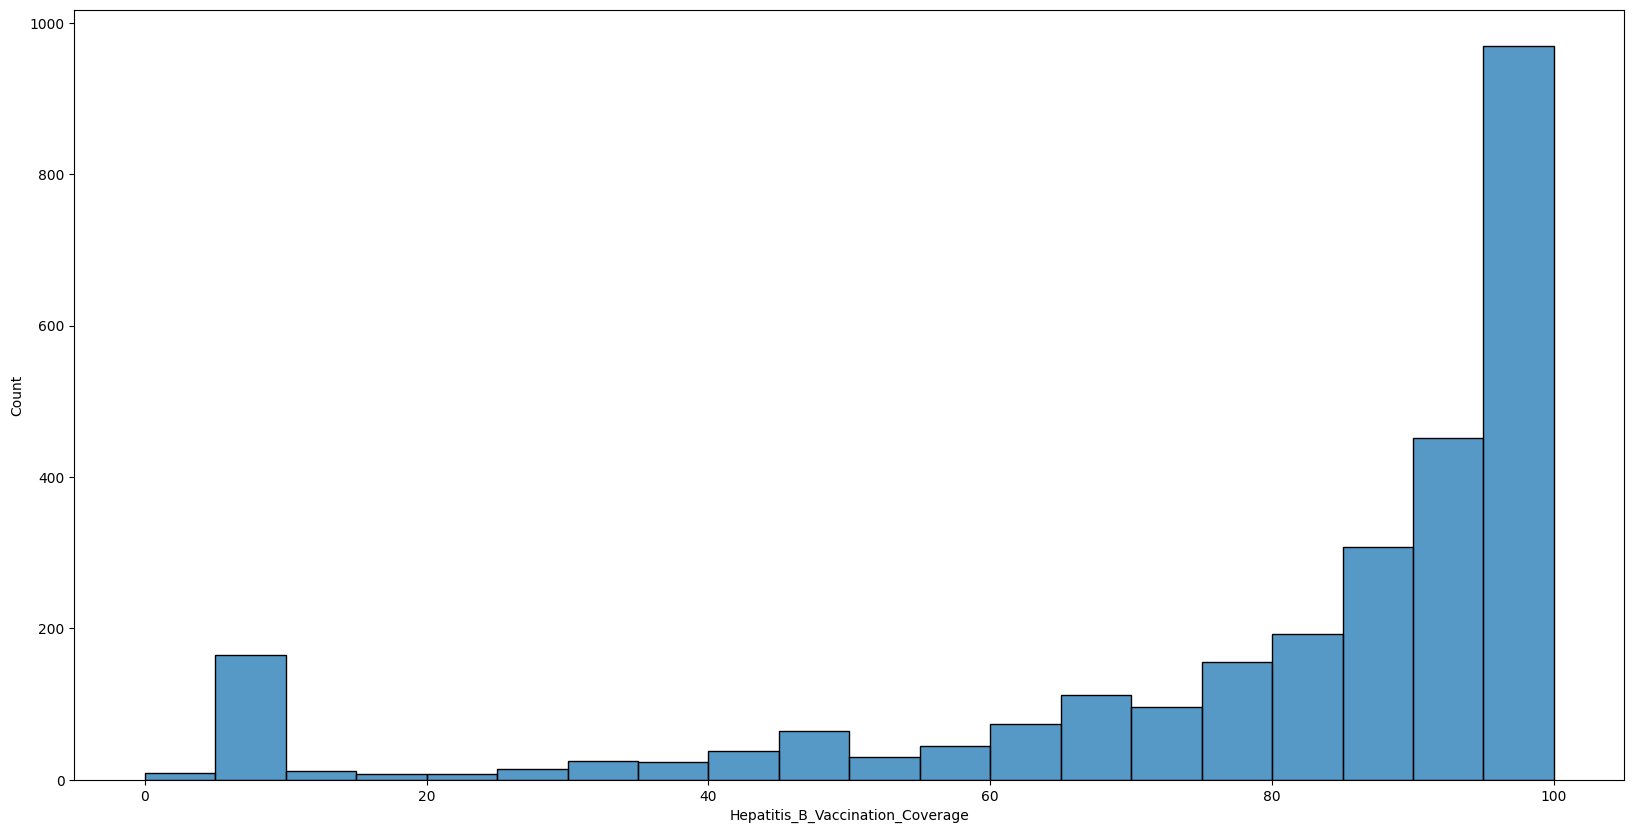

In [17]:
fig = plt.figure(figsize=(20, 10))
sns.histplot(df["Hepatitis_B_Vaccination_Coverage"], bins=20, binrange=(0, 100))

- `most countries have more than 80% vaccinated`

In [18]:
df.isna().sum()

Nation                                1
Survey_Year                           2
Country_Category                      3
Mortality_Adults                     13
Infant_Deaths_Count                   0
Alcohol_Consumption_Rate             17
Expenditure_Percentage_GDP            0
Hepatitis_B_Vaccination_Coverage    144
Measles_Infection_Count               2
Body_Mass_Index_Avg                  34
Polio_Vaccination_Coverage           19
Total_Health_Expenditure            227
Diphtheria_Vaccination_Coverage      19
HIV_AIDS_Prevalence_Rate              0
Gross_Domestic_Product              448
Total_Population                    652
Thinness                             34
Life_Expectancy_Years                10
dtype: int64

<Axes: ylabel='Expenditure_Percentage_GDP'>

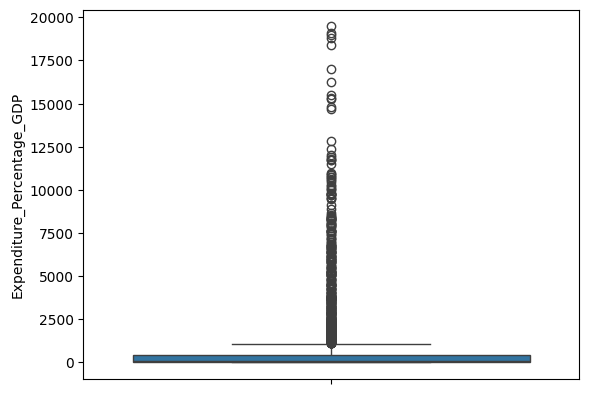

In [19]:
sns.boxplot(df["Expenditure_Percentage_GDP"])

In [20]:
df = df[df["Expenditure_Percentage_GDP"] < 5000]

In [21]:
expe = df["Expenditure_Percentage_GDP"].groupby(df["Nation"]).median()
for country in countirs:
    if expe[country] is np.nan:
        df = df[df["Nation"] != country]
    else:
        df.loc[
            (df["Nation"] == country) & (df["Expenditure_Percentage_GDP"].isna()),
            "Expenditure_Percentage_GDP",
        ] = expe[country]

In [22]:
df.shape

(2802, 18)

In [23]:
countirs = df["Nation"].value_counts().index
# fill with the nearest values
for country in countirs:
    df.loc[df["Nation"] == country, "Total_Health_Expenditure"] = df[
        "Total_Health_Expenditure"
    ].fillna(df[df["Nation"] == country]["Total_Health_Expenditure"].interpolate())

<Axes: xlabel='Total_Health_Expenditure', ylabel='Density'>

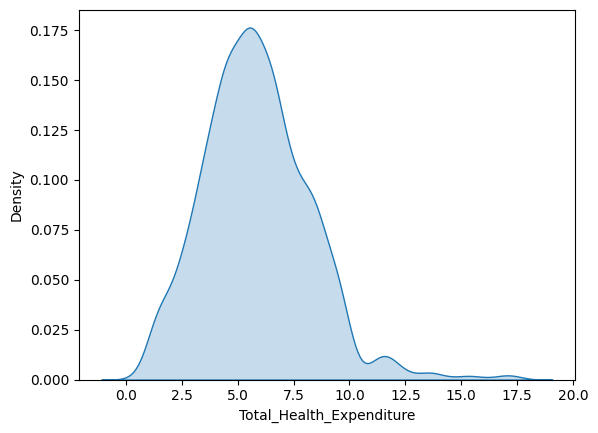

In [24]:
sns.kdeplot(df["Total_Health_Expenditure"], fill=True)

<Axes: ylabel='Total_Health_Expenditure'>

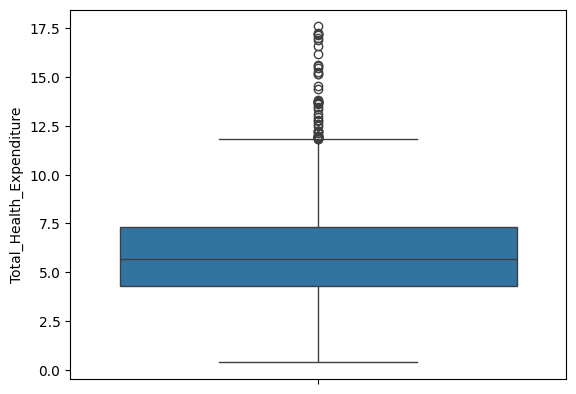

In [25]:
sns.boxplot(df["Total_Health_Expenditure"])

- `Overall total health expenditure is almost gaussian distribution`

In [26]:
gross = df["Gross_Domestic_Product"].groupby(df["Nation"]).median()
for country in countirs:
    if gross[country] is np.nan:
        df = df[df["Nation"] != country]
    else:
        df.loc[
            (df["Nation"] == country) & (df["Gross_Domestic_Product"].isna()),
            "Gross_Domestic_Product",
        ] = gross[country]

<Axes: xlabel='Gross_Domestic_Product', ylabel='Density'>

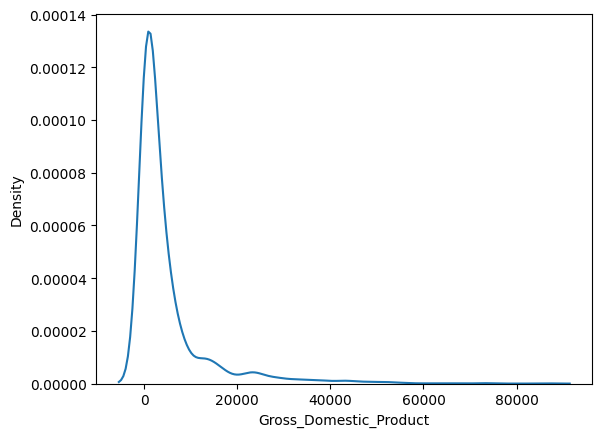

In [27]:
sns.kdeplot(df["Gross_Domestic_Product"])

In [28]:
df = df.loc[df["Gross_Domestic_Product"] <= 20000]

In [29]:
popul = df["Total_Population"].groupby(df["Nation"]).median()
for country in countirs:
    if popul[country] is np.nan:
        df = df[df["Nation"] != country]
    else:
        df.loc[
            (df["Nation"] == country) & (df["Total_Population"].isna()),
            "Total_Population",
        ] = popul[country]

KeyError: "Democratic People's Republic of Korea"